## __Collecting data__

### Dataset: [**IBM HR Analytics Employee Attrition & Performance**](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

#### Mục tiêu: Dự đoán tỷ lệ nghỉ việc của những nhân viên quan trọng dựa trên các yếu tố được khảo sát
#### License Database: Open Database, Contents: Database Contents
#### Bộ dataset này được các nhà khoa học dữ liệu của IBM khảo sát trên 1470 tình nguyện viên.

## __Exploring data__

### __1. Import các thư viện cần thiết__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Đọc dữ liệu từ file `IBM_data.csv`

In [2]:
ibm_df = pd.read_csv('./IBM_data.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)  
ibm_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### __2. Khám phá bộ dữ liệu__

#### _- Bộ dữ liệu có bao nhiêu dòng, bao nhiêu cột?_

In [3]:
row , col = ibm_df.shape
print(f'Bộ dữ liệu này có {row} dòng và {col} cột')

Bộ dữ liệu này có 1470 dòng và 35 cột


#### _- Mỗi dòng trong bộ dữ liệu có ý nghĩa gì?_
Mỗi dòng trong dữ liệu đại diện cho thông tin chi tiết của một nhân viên trong công ty, bao gồm các yếu tố như mức độ hài lòng, thu nhập, tình trạng công tác, và nhiều thông tin liên quan đến công việc của họ.


#### _- Có dòng nào bị trùng lặp không?_

In [4]:
#duplicate_rows = ibm_df[ibm_df.duplicated()]
#print(duplicate_rows)
num_duplicates = ibm_df.duplicated().sum()
print(f"Số dòng trùng lặp: {num_duplicates}")

Số dòng trùng lặp: 0


#### _- Bộ dữ liệu bao gồm những cột nào?_

In [5]:
col_names = ibm_df.columns.tolist()
col_names

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

#### _- Ý nghĩa các cột của bộ dữ liệu_

In [6]:
# Create a new DataFrame with two columns: 'Column Name' and 'Description'
columns_info = [
    ("Age", "Tuổi của nhân viên."),
    ("Attrition", "Tình trạng nghỉ việc của nhân viên (Yes = Đã nghỉ việc, No = Chưa nghỉ việc)."),
    ("BusinessTravel", "Tần suất đi công tác của nhân viên: Travel_Rarely = Đi công tác hiếm khi, Travel_Frequently = Đi công tác thường xuyên, Non-Travel = Không đi công tác."),
    ("DailyRate", "Mức lương hàng ngày của nhân viên."),
    ("Department", "Bộ phận mà nhân viên đang làm việc (ví dụ: Sales, Research & Development)."),
    ("DistanceFromHome", "Khoảng cách giữa nơi làm việc và nhà của nhân viên (tính bằng số dặm)."),
    ("Education", "Mức độ học vấn của nhân viên, mã hóa bằng số (1 đến 5). Các giá trị thường liên quan đến các cấp độ học vấn như sau: 1: Chưa hoàn thành Cao đẳng, 2: Cao đẳng, 3: Cử nhân đại học, 4: Thạc sĩ, 5: Tiến sĩ."),
    ("EducationField", "Lĩnh vực học vấn của nhân viên, ví dụ: Life Sciences = Khoa học sự sống, Medical = Y tế, Other = Các lĩnh vực khác."),
    ("EmployeeCount", "Số lượng nhân viên trong công ty (thường là 1 cho mỗi nhân viên)."),
    ("EmployeeNumber", "Mã số nhận dạng của nhân viên trong hệ thống."),
    ("EnvironmentSatisfaction", "Mức độ hài lòng với môi trường làm việc (từ 1 đến 4, với 1 là Thấp và 4 là rất cao)."),
    ("Gender", "Giới tính của nhân viên (Male = Nam, Female = Nữ)."),
    ("HourlyRate", "Mức lương theo giờ của nhân viên."),
    ("JobInvolvement", "Mức độ tham gia và cống hiến trong công việc của nhân viên (từ 1 đến 4)."),
    ("JobLevel", "Mức độ công việc của nhân viên (1 đến 5, với 1 là mức thấp nhất)."),
    ("JobRole", "Vai trò công việc của nhân viên (ví dụ: Sales Executive, Research Scientist, etc.)."),
    ("JobSatisfaction", "Mức độ hài lòng với công việc của nhân viên (từ 1 đến 4)."),
    ("MaritalStatus", "Tình trạng hôn nhân của nhân viên (Single = Độc thân, Married = Đã kết hôn, Divorced = Ly hôn)."),
    ("MonthlyIncome", "Thu nhập hàng tháng của nhân viên."),
    ("MonthlyRate", "Mức lương hàng tháng."),
    ("NumCompaniesWorked", "Số công ty mà nhân viên đã từng làm việc trong sự nghiệp."),
    ("Over18", "Độ tuổi làm việc có lớn hơn 18 hay chưa(Y = Có, N = Không)."),
    ("OverTime", "Thực hiện làm việc ngoài giờ (Yes = Có, No = Không)."),
    ("PercentSalaryHike", "Tỷ lệ tăng lương của nhân viên (theo phần trăm)."),
    ("PerformanceRating", "Đánh giá hiệu suất công việc của nhân viên (1 đến 4, với 4 là hiệu suất cao nhất)."),
    ("RelationshipSatisfaction", "Mức độ hài lòng với các mối quan hệ tại nơi làm việc (từ 1 đến 4)."),
    ("StandardHours", "Số giờ làm việc chuẩn của nhân viên (thường là 80 giờ)."),
    ("StockOptionLevel", "Mức độ quyền chọn cổ phiếu của nhân viên (0 đến 3)."),
    ("TotalWorkingYears", "Tổng số năm làm việc của nhân viên từ khi bắt đầu sự nghiệp."),
    ("TrainingTimesLastYear", "Số lần tham gia đào tạo trong năm vừa qua."),
    ("WorkLifeBalance", "Mức độ cân bằng giữa công việc và cuộc sống của nhân viên (từ 1 đến 4)."),
    ("YearsAtCompany", "Số năm mà nhân viên đã làm việc tại công ty hiện tại."),
    ("YearsInCurrentRole", "Số năm nhân viên đã đảm nhận vai trò hiện tại."),
    ("YearsSinceLastPromotion", "Số năm kể từ lần thăng chức gần nhất của nhân viên."),
    ("YearsWithCurrManager", "Số năm làm việc dưới sự quản lý của người quản lý hiện tại.")
]

df_columns_info = pd.DataFrame(columns_info, columns=['Column Name', 'Description'])

df_columns_info

,Column Name,Description
0,Age,Tuổi của nhân viên.
1,Attrition,"Tình trạng nghỉ việc của nhân viên (Yes = Đã nghỉ việc, No = Chưa nghỉ việc)."
2,BusinessTravel,"Tần suất đi công tác của nhân viên: Travel_Rarely = Đi công tác hiếm khi, Travel_Frequently = Đi công tác thường xuyên, Non-Travel = Không đi công tác."
3,DailyRate,Mức lương hàng ngày của nhân viên.
4,Department,"Bộ phận mà nhân viên đang làm việc (ví dụ: Sales, Research & Development)."
5,DistanceFromHome,Khoảng cách giữa nơi làm việc và nhà của nhân viên (tính bằng số dặm).
6,Education,"Mức độ học vấn của nhân viên, mã hóa bằng số (1 đến 5). Các giá trị thường liên quan đến các cấp độ học vấn như sau: 1: Chưa hoàn thành Cao đẳng, 2: Cao đẳng, 3: Cử nhân đại học, 4: Thạc sĩ, 5: Tiến sĩ."
7,EducationField,"Lĩnh vực học vấn của nhân viên, ví dụ: Life Sciences = Khoa học sự sống, Medical = Y tế, Other = Các lĩnh vực khác."
8,EmployeeCount,Số lượng nhân viên trong công ty (thường là 1 cho mỗi nhân viên).
9,EmployeeNumber,Mã số nhận dạng của nhân viên trong hệ thống.


#### _- Kiểu dữ liệu hiện tại của các cột là gì?_

In [7]:
print(ibm_df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### _- Kiểm tra kiểu dữ liệu hiện tại có phù hợp hay không?_

Bộ dữ liệu gồm có nhiều cột là object, ta cần ép kiểu các cột sang category

In [8]:
for col in ibm_df.select_dtypes(include='object').columns:
    ibm_df[col] = ibm_df[col].astype('category')

print(ibm_df.dtypes)

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

Sau khi ép kiểu các cột cần thiết sang category thì ta quan sát, các cột dữ liệu có kiểu int64 nhưng thật sự nó là định tính thì ta vẫn phải chuyển nó sang kiểu category. Các cột đó là: `Education`, `EnvironmentSatisfaction`, `JobLevel`, `JobSatisfaction`, `PerformanceRating`, `RelationshipSatisfaction`, `StockOptionLevel`, `WorkLifeBalance`.

In [9]:
cols_to_convert = [
    'Education', 
    'EnvironmentSatisfaction', 
    'JobLevel', 
    'JobSatisfaction', 
    'PerformanceRating', 
    'RelationshipSatisfaction', 
    'StockOptionLevel', 
    'WorkLifeBalance'
]

for col in cols_to_convert:
    ibm_df[col] = ibm_df[col].astype('category')

print(ibm_df.dtypes)


Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
StandardHours                  int64
S

#### _- Các cột kiểu Numerical trong dữ liệu_

In [10]:
numerical_cols = ibm_df.select_dtypes(include=['int64']).columns.tolist()
numerical_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'JobInvolvement',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

#### _- Tỷ lệ dữ liệu bị thiếu của các cột Numerical là bao nhiêu?_

In [11]:
missing_values = ibm_df[numerical_cols].isnull().sum()
missing_values

Age                        0
DailyRate                  0
DistanceFromHome           0
EmployeeCount              0
EmployeeNumber             0
HourlyRate                 0
JobInvolvement             0
MonthlyIncome              0
MonthlyRate                0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [12]:
if all(missing_values == 0):
    print("Không có giá trị bị thiếu trong các cột Numerical.")

Không có giá trị bị thiếu trong các cột Numerical.


#### _- Thống kê các cột Numerical. Dữ liệu có bất thường không?_

In [13]:
ibm_df.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobInvolvement,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,2.729932,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,0.711561,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,3.000000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


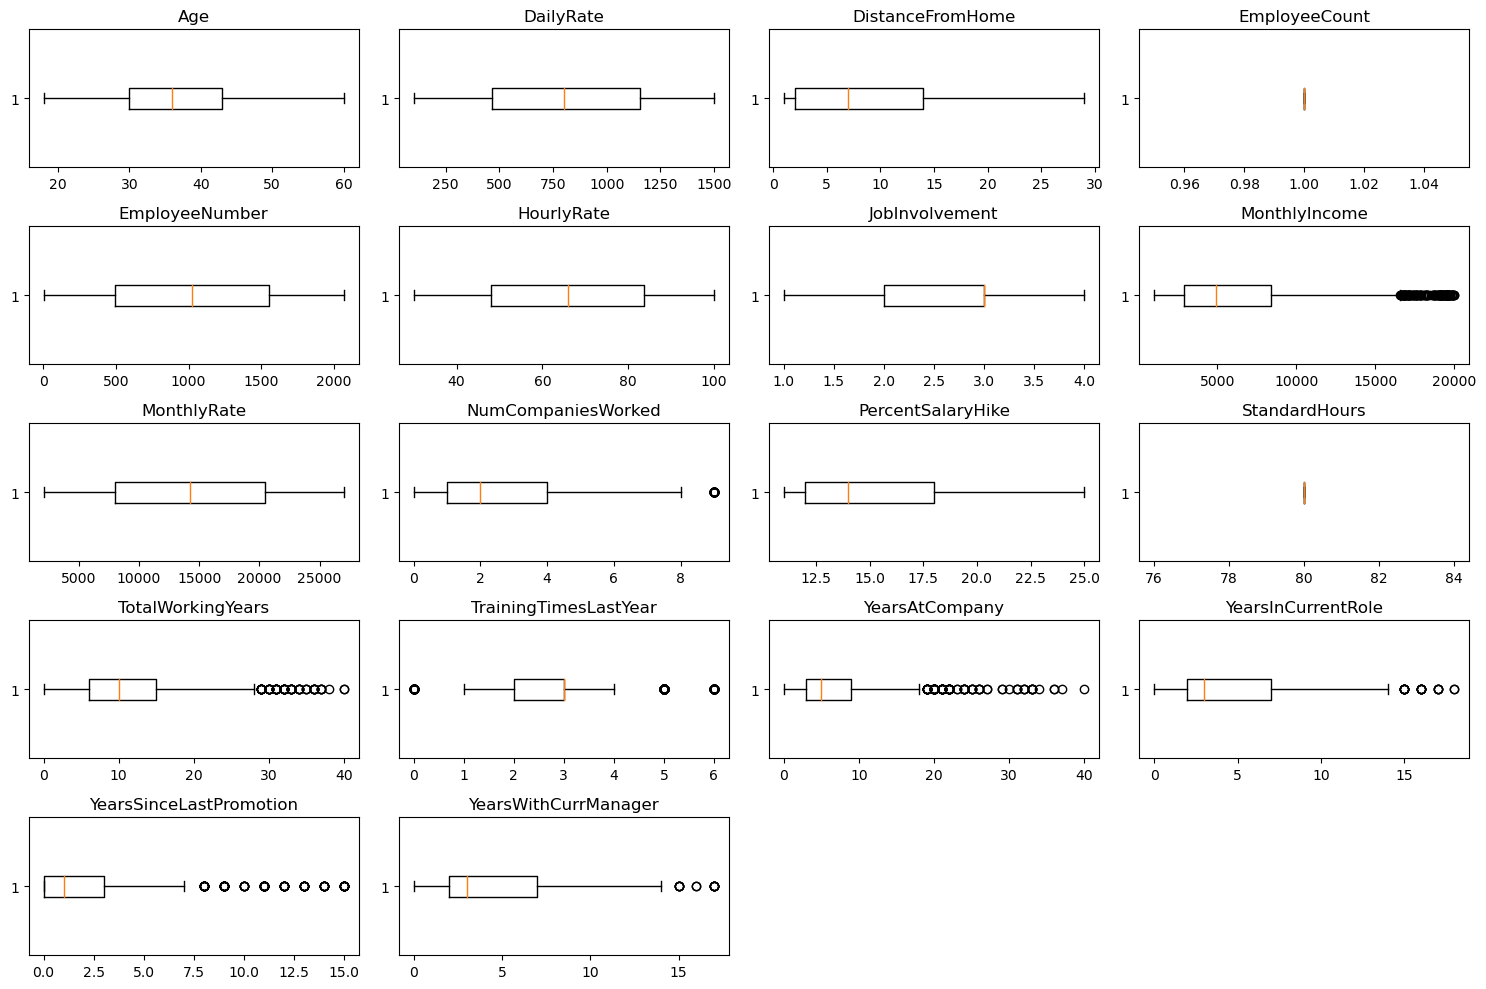

In [14]:
# Tạo boxplots cho từng cột numerical
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(ibm_df[col], vert=False)  # Boxplot nằm ngang
    plt.title(col)

plt.tight_layout()
plt.show()

Theo như thống kê các cột numerical như trên, ta thấy không có điểm bất thường nào. Mặc dù biểu đồ boxplot cho thấy sự hiện diện của nhiều điểm ngoại lai ở các cột "Năm" và "Thu nhập". Tuy nhiên, điều này hoàn toàn hợp lý khi xét đến đặc điểm của tập dữ liệu, nơi mà thâm niên làm việc lâu năm và năng lực làm việc thường đi kèm với mức lương và thưởng cao hơn.

#### _- Các cột Categorical trong bộ dữ liệu_

In [15]:
categorical_cols = ibm_df.select_dtypes(include=['category']).columns.tolist()
categorical_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

#### _- Tỷ lệ dữ liệu bị thiếu của các cột Categorical là bao nhiêu?_

In [16]:
missing_values = ibm_df[categorical_cols].isnull().sum()
missing_values

Attrition                   0
BusinessTravel              0
Department                  0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
Over18                      0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
WorkLifeBalance             0
dtype: int64

In [17]:
if all(missing_values == 0):
    print("Không có giá trị bị thiếu trong các cột Categorical.")

Không có giá trị bị thiếu trong các cột Categorical.


#### _- Có bao nhiêu giá trị khác nhau trong các cột Categorical?_

In [18]:
unique_values = {}
for col in categorical_cols:
    unique_values[col] = {
        "Unique Count": ibm_df[col].nunique(),
        "Sample Values": ibm_df[col].unique().tolist()
    }

unique_values_df = pd.DataFrame(unique_values).T
unique_values_df.columns = ["Unique Count", "Sample Values"]
unique_values_df

,Unique Count,Sample Values
Attrition,2,"[Yes, No]"
BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
Department,3,"[Sales, Research & Development, Human Resources]"
Education,5,"[2, 1, 4, 3, 5]"
EducationField,6,"[Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources]"
EnvironmentSatisfaction,4,"[2, 3, 4, 1]"
Gender,2,"[Female, Male]"
JobLevel,5,"[2, 1, 3, 4, 5]"
JobRole,9,"[Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources]"
JobSatisfaction,4,"[4, 2, 3, 1]"


Theo như thống kê các cột Categorical trên thì ta thấy cột `Over18` chỉ có 1 giá trị duy nhất, ta sẽ loại bỏ cột này khỏi bộ dữ liệu, còn lại thì không còn điểm bất thường nào nữa.

In [19]:
ibm_df = ibm_df.drop(['Over18'], axis=1)
ibm_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2


### Lưu dataframe ibm_df đã tiền xử lý vào file `IBM_data_processed.csv`

In [20]:
ibm_df.to_csv("IBM_data_processed.csv", sep=',', encoding='utf-8', index=False)